## Author

# Rehan Zakir

# Task #1 Predict the Percentage of Student Using Linear Regression

## Libraries Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading Data From Link

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plotting Graph to see relationship between the attributes.

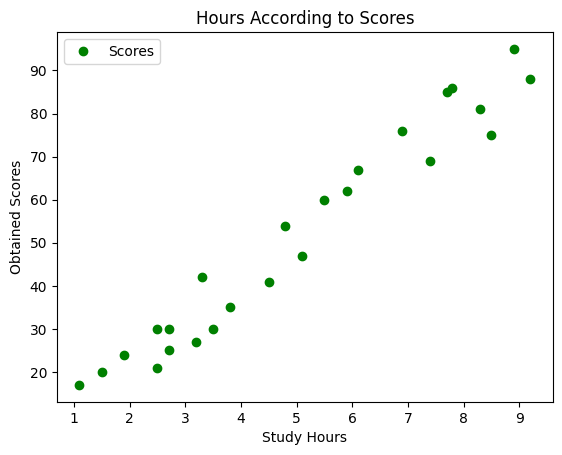

In [10]:
df.plot(x="Hours", y="Scores", style="o", color="Green")
plt.title("Hours According to Scores")
plt.xlabel("Study Hours")
plt.ylabel("Obtained Scores")
plt.show()

## As we can clearly see a positive linear relation between attributes from the above graph.

# Analyzing Data

In [11]:
df.shape

(25, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Preparing Data for Training

In [15]:
x = df.iloc[:, :-1].values

In [16]:
y = df.iloc[:, 1].values 

## Splitting Data for Training and Testing Purposes

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

# Calculating Line

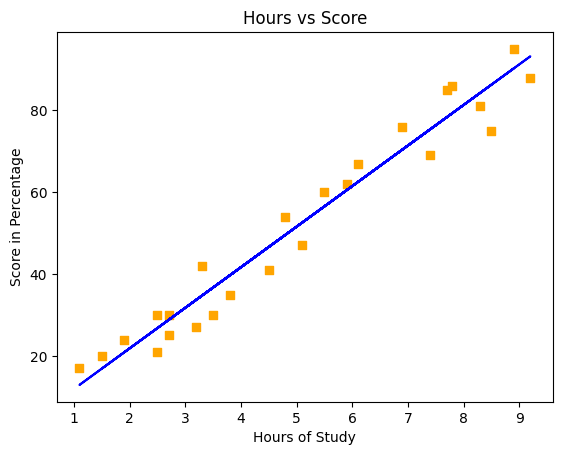

In [25]:
line = LR.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y, marker=",", color="orange")
plt.plot(x, line, color="blue");
plt.title("Hours vs Score")
plt.xlabel("Hours of Study")
plt.ylabel("Score in Percentage")
plt.show()

In [26]:
y_pred = LR.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


## Actual and Predicted Values Comparison

In [28]:
scores_comparison = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
scores_comparison

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Student who studies 9.25 hrs/day

In [29]:
time = 9.25
pred_value = model.predict(np.array([[time]]))
print("Predicted Score for ", time ,"is" , pred_value)

Predicted Score for  9.25 is [93.69173249]


# Performance Metrices of this Model

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error is: ", mse)
print("Mean Absolute Error is: ", mae)
print("r2 Score is: ", r2)

Mean Squared Error is:  21.598769307217406
Mean Absolute Error is:  4.183859899002975
r2 Score is:  0.9454906892105355
